In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [271]:
mea1 = pd.read_csv("measurements.csv")
mea1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [272]:
mea1 = mea1.drop(["refill liters", "refill gas"], axis=1)
mea1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,NaN,E10,0,0,0
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0
385,16,"3,8",45,25,19,NaN,SP98,0,0,0
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0


In [273]:
mea1.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
AC                0
rain              0
sun               0
dtype: int64

In [274]:
mea1["specials"].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [276]:
#mea1["temp_inside"].unique()
#mea1 = mea1.dropna()
#mea1["temp_inside"].unique()

#the number of different values and how little differ to each other leads me to think it has nothing to do with the end comsumption

In [277]:
mea1 = mea1.drop(["specials"], axis=1)
mea1 = mea1.drop(["temp_inside"], axis=1)
mea1

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun
0,28,5,26,12,E10,0,0,0
1,12,"4,2",30,13,E10,0,0,0
2,"11,2","5,5",38,15,E10,0,0,0
3,"12,9","3,9",36,14,E10,0,0,0
4,"18,5","4,5",46,15,E10,0,0,0
...,...,...,...,...,...,...,...,...
383,16,"3,7",39,18,SP98,0,0,0
384,"16,1","4,3",38,31,SP98,1,0,0
385,16,"3,8",45,19,SP98,0,0,0
386,"15,4","4,6",42,31,SP98,1,0,0


In [278]:
mea1 = mea1.dropna()

In [279]:
mea1["distance"] = mea1["distance"].str.replace(",", ".")
mea1["consume"] = mea1["consume"].str.replace(",", ".")
mea1["distance"] = mea1["distance"].astype(float)
mea1["consume"] = mea1["consume"].astype(float)
mea1["speed"] = mea1["speed"].astype(float)
mea1["gas/distance"] = mea1["distance"]/mea1["consume"]
mea1["gas/speed"] = mea1["speed"]/mea1["consume"]
mea1

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun,gas/distance,gas/speed
0,28.0,5.0,26.0,12,E10,0,0,0,5.600000,5.200000
1,12.0,4.2,30.0,13,E10,0,0,0,2.857143,7.142857
2,11.2,5.5,38.0,15,E10,0,0,0,2.036364,6.909091
3,12.9,3.9,36.0,14,E10,0,0,0,3.307692,9.230769
4,18.5,4.5,46.0,15,E10,0,0,0,4.111111,10.222222
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,18,SP98,0,0,0,4.324324,10.540541
384,16.1,4.3,38.0,31,SP98,1,0,0,3.744186,8.837209
385,16.0,3.8,45.0,19,SP98,0,0,0,4.210526,11.842105
386,15.4,4.6,42.0,31,SP98,1,0,0,3.347826,9.130435


In [280]:
mea1.sort_values(by = "gas/speed")

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun,gas/distance,gas/speed
147,1.7,10.8,14.0,10,E10,0,1,0,0.157407,1.296296
210,1.3,11.5,21.0,10,SP98,0,0,0,0.113043,1.826087
61,2.1,12.2,23.0,9,SP98,1,1,0,0.172131,1.885246
45,2.0,9.9,21.0,4,SP98,0,0,0,0.202020,2.121212
60,2.9,7.9,18.0,9,SP98,1,1,0,0.367089,2.278481
...,...,...,...,...,...,...,...,...,...,...
193,56.1,4.8,82.0,13,SP98,0,0,0,11.687500,17.083333
318,211.0,4.6,80.0,20,SP98,0,0,0,45.869565,17.391304
273,93.9,4.8,88.0,18,E10,1,0,1,19.562500,18.333333
189,130.3,4.6,85.0,12,E10,0,0,0,28.326087,18.478261


In [281]:
def t_test_features(s1, s2, features=['distance', 'consume', 'speed']):
   
    results = {x:st.ttest_ind(s1[x], s2[x]).pvalue for x in features}

    return results

In [282]:
t_test_features(mea1[mea1["gas_type"]=="E10"], mea1[mea1["gas_type"]=="SP98"] )

{'distance': 0.2939767625788915,
 'consume': 0.7634526478628367,
 'speed': 0.055346717706321165}

In [283]:
### the difference in distance and consume between both gas types is quite big

In [284]:
mea1 = pd.get_dummies(mea1, columns = ["gas_type"])
mea1

,distance,consume,speed,temp_outside,AC,rain,sun,gas/distance,gas/speed,gas_type_E10,gas_type_SP98
0,28.0,5.0,26.0,12,0,0,0,5.600000,5.200000,1,0
1,12.0,4.2,30.0,13,0,0,0,2.857143,7.142857,1,0
2,11.2,5.5,38.0,15,0,0,0,2.036364,6.909091,1,0
3,12.9,3.9,36.0,14,0,0,0,3.307692,9.230769,1,0
4,18.5,4.5,46.0,15,0,0,0,4.111111,10.222222,1,0
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,18,0,0,0,4.324324,10.540541,0,1
384,16.1,4.3,38.0,31,1,0,0,3.744186,8.837209,0,1
385,16.0,3.8,45.0,19,0,0,0,4.210526,11.842105,0,1
386,15.4,4.6,42.0,31,1,0,0,3.347826,9.130435,0,1


<AxesSubplot:>

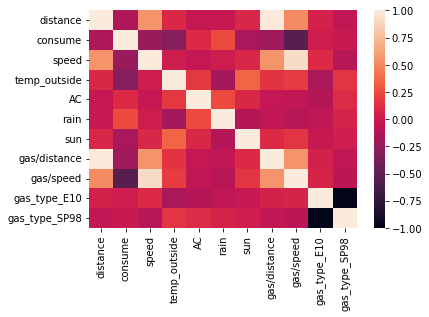

In [286]:
corr = mea1.corr()
sns.heatmap(corr)

In [ ]:
#is hard to see any real correlation, but there's a couple interesting points:
# 1.- Speed and Distance are directly proportional = higher distance -> higher speeds
# 2.- Speed and Consume are antiproportional = higher speed -> less fuel
# 3.- Temperature and Consume are antiproportional = less temperature outside -> higher consumption

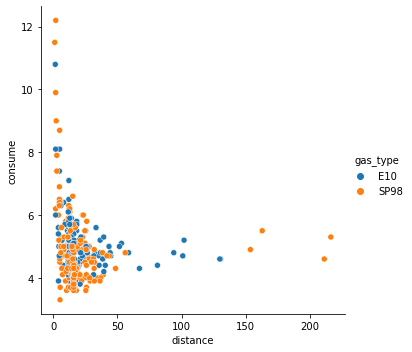

In [156]:
sns.relplot(x=mea1["distance"], y=mea1["consume"],hue=mea1["gas_type"])

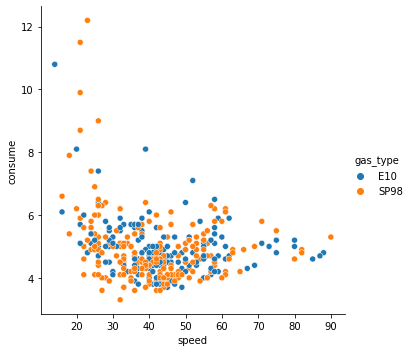

In [157]:
sns.relplot(x=mea1["speed"], y=mea1["consume"],hue=mea1["gas_type"])

In [158]:
mea98 = mea1[mea1["gas_type"] == "SP98"]
mea10 = mea1[mea1["gas_type"] == "E10"]   

<AxesSubplot:xlabel='distance', ylabel='consume'>

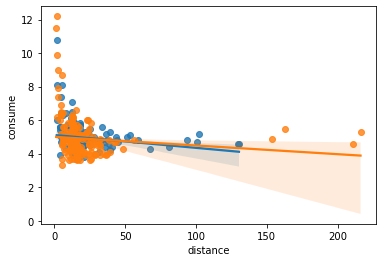

In [291]:

sns.regplot(x="distance", y="consume", data=mea10)
sns.regplot(x="distance", y="consume", data=mea98)

In [160]:
### The comsumption is very similar when looking at the vast majority of trips did, with a little tendence to smaller consumtion of E10 in longer trips.

<AxesSubplot:xlabel='speed', ylabel='consume'>

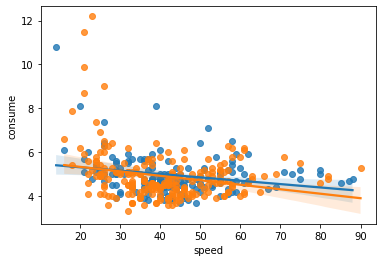

In [161]:
sns.regplot(x="speed", y="consume", data=mea10)
sns.regplot(x="speed", y="consume", data=mea98)

In [162]:
### like before, the comsuptions are quite similar, but this time SP98 seems to be the choice when the speed average is higher.

<AxesSubplot:xlabel='AC', ylabel='consume'>

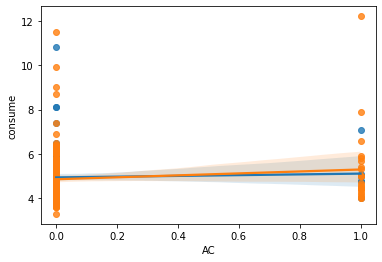

In [163]:
sns.regplot(x="AC", y="consume", data=mea10)
sns.regplot(x="AC", y="consume", data=mea98)

In [287]:
#there's just a little difference with the AC on, where the SP98 needs some more fuel

<AxesSubplot:xlabel='temp_outside', ylabel='consume'>

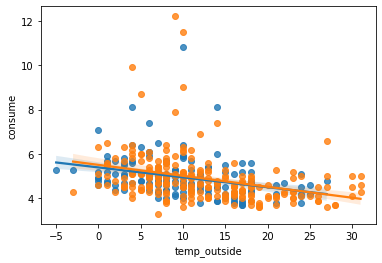

In [288]:
sns.regplot(x="temp_outside", y="consume", data=mea10)
sns.regplot(x="temp_outside", y="consume", data=mea98)

In [ ]:
### Outside Temperature affects both almost in the same way

In [165]:
mea1.groupby("gas_type").mean()

,distance,consume,speed,temp_outside,AC,rain,sun,gas/distance,gas/speed
gas_type,,,,,,,,,
E10,21.095541,4.950955,43.566879,10.031847,0.044586,0.101911,0.070064,4.453881,9.111434
SP98,18.866667,4.906849,40.803653,12.278539,0.105023,0.141553,0.091324,4.056992,8.713723


In [166]:
### while grouping by gas type, we see that with E10 the car tends to make 4.45 Kilometers per litre.
### We should take into account that as previously seen, in colder temperatures the comsumption is worse (against E10) but also a higher average speed gives a better mileage (pro E10)

In [ ]:
### Like many other things, the difference in price between them both will be the key point to decide which one is better for any given moment.
### But, based on data, I would choose SP98 for longer/intercity trips, without AC and E10 for the rest.